In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = car_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_ordinal_features(data_1)
data_3 = data_processor.standardize_data(data_2,data_2,features=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [3]:
data_3

,buying,maint,doors,persons,lug_boot,safety,Class
0,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,-1.22439,unacc
1,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,0.00000,unacc
2,-1.341253,-1.341253,-1.341253,-1.22439,-1.22439,1.22439,unacc
3,-1.341253,-1.341253,-1.341253,-1.22439,0.00000,-1.22439,unacc
4,-1.341253,-1.341253,-1.341253,-1.22439,0.00000,0.00000,unacc
...,...,...,...,...,...,...,...
1723,1.341253,1.341253,1.341253,1.22439,0.00000,0.00000,good
1724,1.341253,1.341253,1.341253,1.22439,0.00000,1.22439,vgood
1725,1.341253,1.341253,1.341253,1.22439,1.22439,-1.22439,unacc
1726,1.341253,1.341253,1.341253,1.22439,1.22439,0.00000,good


In [4]:
data_train, data_val = cross_validator.random_partition(data_3, random_state=42)

In [5]:
data_val = data_processor.encode_nominal_features(data_val)

In [6]:
data_val

,buying,maint,doors,persons,lug_boot,safety,Class_acc,Class_good,Class_unacc,Class_vgood
599,-0.447084,-0.447084,0.447084,-1.22439,0.00000,1.22439,0,0,1,0
1201,0.447084,1.341253,-1.341253,0.00000,0.00000,0.00000,1,0,0,0
628,-0.447084,-0.447084,1.341253,-1.22439,1.22439,0.00000,0,0,1,0
1498,1.341253,-0.447084,1.341253,0.00000,0.00000,0.00000,1,0,0,0
1263,0.447084,1.341253,0.447084,1.22439,0.00000,-1.22439,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
100,-1.341253,-1.341253,1.341253,1.22439,-1.22439,0.00000,0,0,1,0
274,-1.341253,0.447084,0.447084,-1.22439,0.00000,0.00000,0,0,1,0
1206,0.447084,1.341253,-1.341253,1.22439,-1.22439,-1.22439,0,0,1,0
101,-1.341253,-1.341253,1.341253,1.22439,-1.22439,1.22439,0,0,1,0


In [7]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-4]
y_val = data_test[:,-4:]

In [8]:
data_train

,buying,maint,doors,persons,lug_boot,safety,Class
107,-1.341253,-1.341253,1.341253,1.22439,1.22439,1.22439,unacc
901,0.447084,-1.341253,-0.447084,0.00000,-1.22439,0.00000,unacc
1709,1.341253,1.341253,1.341253,-1.22439,1.22439,1.22439,unacc
706,-0.447084,0.447084,0.447084,-1.22439,0.00000,0.00000,unacc
678,-0.447084,0.447084,-0.447084,-1.22439,0.00000,-1.22439,unacc
...,...,...,...,...,...,...,...
1130,0.447084,0.447084,-0.447084,1.22439,0.00000,1.22439,vgood
1294,0.447084,1.341253,1.341253,1.22439,1.22439,0.00000,good
860,-0.447084,1.341253,1.341253,1.22439,0.00000,1.22439,acc
1459,1.341253,-0.447084,0.447084,-1.22439,-1.22439,0.00000,unacc


In [9]:
import random

iterations = 15

param_space = {
    'lr': [0.001,0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.linspace(5000, 20000, num=20).astype(int).tolist()
}

best_score = float('inf')
best_params_linear = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    print(f"Testing params: {params}")

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):
    
        train_set = data_processor.encode_nominal_features(train_set)

        train_data = train_set.to_numpy()
        X_train = train_data[:,:-4]
        y_train = train_data[:,-4:]

        linear = LinearNetwork(config)

        _, val_losses = linear.logistic_regression(X_train,y_train,X_val,y_val,epochs=params['epochs'],lr=params['lr'],patience=np.inf)

        score = val_losses[-1]
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score.")
            break  # Exit the current for-loop
        
    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_linear = params
        

print(f"Best parameters: {best_params_linear}, Best score: {best_score}")


Testing params: {'lr': 0.0001, 'epochs': 15263}
Skipping params: {'lr': 0.0001, 'epochs': 15263} due to high score.
Tested params: {'lr': 0.0001, 'epochs': 15263}, Score: 0.41081176080693943
Testing params: {'lr': 0.0001, 'epochs': 8947}
Skipping params: {'lr': 0.0001, 'epochs': 8947} due to high score.
Tested params: {'lr': 0.0001, 'epochs': 8947}, Score: 0.41770325635835276
Testing params: {'lr': 0.001, 'epochs': 16842}
Skipping params: {'lr': 0.001, 'epochs': 16842} due to high score.
Tested params: {'lr': 0.001, 'epochs': 16842}, Score: 0.40158658154749993
Testing params: {'lr': 0.001, 'epochs': 17631}
Skipping params: {'lr': 0.001, 'epochs': 17631} due to high score.
Tested params: {'lr': 0.001, 'epochs': 17631}, Score: 0.40154822284753333
Testing params: {'lr': 1e-06, 'epochs': 11315}
Skipping params: {'lr': 1e-06, 'epochs': 11315} due to high score.
Tested params: {'lr': 1e-06, 'epochs': 11315}, Score: 0.6253265810638988
Testing params: {'lr': 0.001, 'epochs': 8947}
Skipping par

In [10]:
import random

iterations = 15

param_space = {
    'lr': [0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(5000, 20000, 2000).tolist(),
    'n_hidden': np.arange(X_val.shape[1], 60, 15)
}

best_score = float('inf')
best_params_ffn = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    print(f"Testing params: {params}")

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):
    
        train_set = data_processor.encode_nominal_features(train_set)

        train_data = train_set.to_numpy()
        X_train = train_data[:,:-4]
        y_train = train_data[:,-4:]

        ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=params['n_hidden'],n_hidden_2=params['n_hidden'],n_output=y_train.shape[1])

        _, val_losses, _ = ffn.train(X_train,y_train,X_val,y_val,epochs=params['epochs'],lr=params['lr'],patience=500)

        score = val_losses[-1]
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score.")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_ffn = params
        

print(f"Best parameters: {best_params_ffn}, Best score: {best_score}")


Testing params: {'lr': 1e-05, 'epochs': 9000, 'n_hidden': 6}
Skipping params: {'lr': 1e-05, 'epochs': 9000, 'n_hidden': 6} due to high score.
Tested params: {'lr': 1e-05, 'epochs': 9000, 'n_hidden': 6}, Score: 0.8678054958021445
Testing params: {'lr': 1e-05, 'epochs': 15000, 'n_hidden': 51}
Skipping params: {'lr': 1e-05, 'epochs': 15000, 'n_hidden': 51} due to high score.
Tested params: {'lr': 1e-05, 'epochs': 15000, 'n_hidden': 51}, Score: 0.45562835589304573
Testing params: {'lr': 0.0001, 'epochs': 15000, 'n_hidden': 51}
Tested params: {'lr': 0.0001, 'epochs': 15000, 'n_hidden': 51}, Score: 0.09680569367472854
Testing params: {'lr': 0.0001, 'epochs': 5000, 'n_hidden': 51}
Skipping params: {'lr': 0.0001, 'epochs': 5000, 'n_hidden': 51} due to high score.
Tested params: {'lr': 0.0001, 'epochs': 5000, 'n_hidden': 51}, Score: 0.232982181600254
Testing params: {'lr': 1e-06, 'epochs': 9000, 'n_hidden': 51}
Skipping params: {'lr': 1e-06, 'epochs': 9000, 'n_hidden': 51} due to high score.
Te

In [ ]:
import random

iterations = 15

param_space = {
    'lr': [0.001,0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(5000, 20000, 2000).tolist(),
    'n_encoder': np.arange(2,X_val.shape[1]-1,1).tolist()
}

best_score = float('inf')
best_params_auto = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):
    
        train_set = data_processor.encode_nominal_features(train_set)

        train_data = train_set.to_numpy()
        X_train = train_data[:,:-4]
        y_train = train_data[:,-4:]

        autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=params['n_encoder'])

        losses = autoE.train(X_train, max_epochs=params['epochs'], lr=params['lr'])

        score = losses[-1]
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score.")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_auto = params
        

print(f"Best parameters: {best_params_auto}, Best score: {best_score}")


Skipping params: {'lr': 1e-05, 'epochs': 19000, 'n_encoder': 2} due to high score: 0.5119282422554161
Tested params: {'lr': 1e-05, 'epochs': 19000, 'n_encoder': 2}, Score: 0.5119282422554161
Skipping params: {'lr': 1e-07, 'epochs': 15000, 'n_encoder': 2} due to high score: 0.775706004102815
Tested params: {'lr': 1e-07, 'epochs': 15000, 'n_encoder': 2}, Score: 0.775706004102815
Skipping params: {'lr': 1e-05, 'epochs': 7000, 'n_encoder': 3} due to high score: 0.4089134955182551
Tested params: {'lr': 1e-05, 'epochs': 7000, 'n_encoder': 3}, Score: 0.4089134955182551
Tested params: {'lr': 0.0001, 'epochs': 5000, 'n_encoder': 5}, Score: 0.14052794815010286
Skipping params: {'lr': 1e-06, 'epochs': 11000, 'n_encoder': 5} due to high score: 0.7739698980470101
Tested params: {'lr': 1e-06, 'epochs': 11000, 'n_encoder': 5}, Score: 0.7739698980470101
Skipping params: {'lr': 0.0001, 'epochs': 1000, 'n_encoder': 2} due to high score: 0.5266316653649191
Tested params: {'lr': 0.0001, 'epochs': 1000, 'n

In [ ]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=best_params_auto['n_encoder'])
losses = autoE.train(X_train, max_epochs=best_params_auto['epochs'], lr=best_params_auto['lr'])
losses[-1]

0.13856338687548111

In [ ]:
import random

iterations = 15

param_space = {
    'lr': [0.001,0.0001,0.00001,0.000001,0.0000001],
    'epochs': np.arange(5000, 20000, 2000).tolist(),
    'n_hidden_2': np.arange(X_val.shape[1], 60, 15)
}

best_score = float('inf')
best_params_combined = {}

for _ in range(iterations):

    # Randomly select parameters
    params = {key: random.choice(value) for key, value in param_space.items()}
    scores = []
    print(f"Testing params: {params}")

    for i, (train_set, _) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):
    
        train_set = data_processor.encode_nominal_features(train_set)

        train_data = train_set.to_numpy()
        X_train = train_data[:,:-4]
        y_train = train_data[:,-4:]

        combined = CombinedModel(autoE,n_hidden_2=params['n_hidden_2'],n_output=y_val.shape[1])

        _, val_losses, _ = combined.train(X_train,y_train,X_val,y_val,epochs=params['epochs'], lr=params['lr'],patience=500)


        score = val_losses[-1]
        scores.append(score)

        # Skip to the next parameter set if score > 0.2
        if score > 0.2:
            print(f"Skipping params: {params} due to high score: {score}")
            break  # Exit the current for-loop

    avg_score = np.mean(scores)

    print(f"Tested params: {params}, Score: {avg_score}")
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_combined = params
        

print(f"Best parameters: {best_params_combined}, Best score: {best_score}")


Skipping params: {'lr': 1e-05, 'epochs': 5000, 'n_hidden_2': 2} due to high score: 0.21302964724649376
Tested params: {'lr': 1e-05, 'epochs': 5000, 'n_hidden_2': 2}, Score: 0.21302964724649376
Skipping params: {'lr': 0.0001, 'epochs': 3000, 'n_hidden_2': 6} due to high score: 0.21100967540221627
Tested params: {'lr': 0.0001, 'epochs': 3000, 'n_hidden_2': 6}, Score: 0.21100967540221627
Skipping params: {'lr': 1e-05, 'epochs': 19000, 'n_hidden_2': 5} due to high score: 0.2143173905786451
Tested params: {'lr': 1e-05, 'epochs': 19000, 'n_hidden_2': 5}, Score: 0.2143173905786451
Skipping params: {'lr': 0.0001, 'epochs': 15000, 'n_hidden_2': 4} due to high score: 0.21099434508970913
Tested params: {'lr': 0.0001, 'epochs': 15000, 'n_hidden_2': 4}, Score: 0.21099434508970913
Skipping params: {'lr': 1e-07, 'epochs': 17000, 'n_hidden_2': 2} due to high score: 0.34852841662211764
Tested params: {'lr': 1e-07, 'epochs': 17000, 'n_hidden_2': 2}, Score: 0.34852841662211764
Skipping params: {'lr': 1e-

## Model Performance ##

In [ ]:
linear_scores = []
ffn_scores = []
combined_scores = []

for i, (train_set, test_set) in enumerate(cross_validator.cross_validation(data_train, n_splits=2, n_repeats=5, random_state=42, stratify=True)):

    train_set = data_processor.encode_nominal_features(train_set)
    test_set = data_processor.encode_nominal_features(test_set)

    train_data = train_set.to_numpy()
    X_train = train_data[:,:-4]
    y_train = train_data[:,-4:]

    test_data = test_set.to_numpy()
    X_test = test_data[:,:-4]
    y_test = test_data[:,-4:]

    linear = LinearNetwork(config)
    _, linear_val_losses = linear.logistic_regression(X_train,y_train,X_test,y_test,epochs=best_params_linear['epochs'],lr=best_params_linear['lr'],patience=np.inf)

    ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=best_params_ffn['n_hidden'],n_hidden_2=best_params_ffn['n_hidden'],n_output=y_train.shape[1])
    _, ffn_val_losses, _ = ffn.train(X_train,y_train,X_test,y_test,epochs=best_params_ffn['epochs'],lr=best_params_ffn['lr'],patience=np.inf)

    autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=best_params_auto['n_encoder'])
    losses = autoE.train(X_train, max_epochs=best_params_auto['epochs'], lr=best_params_auto['lr'])
    combined = CombinedModel(autoE,n_hidden_2=best_params_combined['n_hidden_2'],n_output=y_test.shape[1])
    _, combined_val_losses, _ = combined.train(X_train,y_train,X_test,y_test,epochs=best_params_combined['epochs'], lr=best_params_combined['lr'],patience=np.inf)


    linear_score = np.min(linear_val_losses)
    ffn_score = np.min(ffn_val_losses)
    combined_score = np.min(combined_val_losses)
    
    linear_scores.append(linear_score)
    ffn_scores.append(ffn_score)
    combined_scores.append(combined_score)

avg_score_linear = np.mean(linear_scores)
avg_score_ffn = np.mean(ffn_scores)
avg_score_combined = np.mean(combined_scores)

print(f"Linear Model Tested params: {best_params_linear}, Average Score: {avg_score_linear}")
print(f"FFN Model Tested params: {best_params_ffn}, Average Score: {avg_score_ffn}")
print(f"Combined Model Tested params: {best_params_combined}, Average Score: {avg_score_combined}")

print(f"Linear Model Scores: {linear_scores}")
print(f"FFN Model Scores: {ffn_scores}")
print(f"Combined Model Scores: {combined_scores}")



Linear Model Tested params: {'lr': 1e-05, 'epochs': 16000}, Average Score: 0.04989911176833896
FFN Model Tested params: {'lr': 0.0001, 'epochs': 9000, 'n_hidden': 13}, Average Score: 0.03156401749087871
Combined Model Tested params: {'lr': 0.0001, 'epochs': 17000, 'n_hidden_2': 2}, Average Score: 0.18956194648423397
Linear Model Scores: [0.0505000841400078, 0.04918110999398384, 0.05035961379445303, 0.04952270884214627, 0.047728709073474665, 0.051374267862787815, 0.051798825129258506, 0.04851693151371093, 0.05040374914517882, 0.049605118188387975]
FFN Model Scores: [0.03359497771019102, 0.032634738953724624, 0.025770116157577162, 0.033536566622630326, 0.03010756680708861, 0.03351205924653568, 0.032073554484799295, 0.0302916960663417, 0.033118007017676795, 0.031000891842221913]
Combined Model Scores: [0.18992116083816254, 0.189201816211392, 0.18992146398954116, 0.18920090264527847, 0.18992062012505473, 0.1892022910473092, 0.1899204139983393, 0.18920491250373522, 0.18992265491993404, 0.18

In [ ]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(linear_scores, ffn_scores)
print(f"Linear Model vs. FFN Model: t-statistic = {t_stat}, p-value = {p_val}")

# Comparing Linear Model vs. Combined Model
t_stat, p_val = stats.ttest_ind(linear_scores, combined_scores)
print(f"Linear Model vs. Combined Model: t-statistic = {t_stat}, p-value = {p_val}")

# Comparing FFN Model vs. Combined Model
t_stat, p_val = stats.ttest_ind(ffn_scores, combined_scores)
print(f"FFN Model vs. Combined Model: t-statistic = {t_stat}, p-value = {p_val}")

Linear Model vs. FFN Model: t-statistic = 21.213127344778, p-value = 3.4769130932319286e-14
Linear Model vs. Combined Model: t-statistic = -339.07928011744707, p-value = 1.0464626991282104e-35
FFN Model vs. Combined Model: t-statistic = -202.94519565836433, p-value = 1.0746998437377001e-31


## Archive ##

In [ ]:
# data_train = data_processor.encode_nominal_features(data_train)
# # data_val = data_processor.encode_nominal_features(data_val)     

In [ ]:
# data = data_train.to_numpy()
# X_train = data[:,:-4]
# y_train = data[:,-4:]

In [ ]:
# data_test = data_val.to_numpy()
# X_val = data_test[:,:-4]
# y_val = data_test[:,-4:]

In [ ]:
# X_train.shape

(1382, 6)

In [ ]:
# autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=4)

# autoE.train(X_train, max_epochs=20000, lr=0.0001)

[0.9944572214658505,
 0.9944211142740377,
 0.9944010212794319,
 0.9943892307272889,
 0.9943817251075924,
 0.9943764093822699,
 0.9943721889208345,
 0.9943684896224162,
 0.9943650081583324,
 0.9943615819749549,
 0.9943581216231622,
 0.9943545755242066,
 0.9943509116161269,
 0.9943471077848369,
 0.9943431468664367,
 0.9943390140278618,
 0.9943346953845406,
 0.9943301772610029,
 0.994325445785209,
 0.9943204866555801,
 0.994315284996864,
 0.9943098252611032,
 0.9943040911508638,
 0.994298065552749,
 0.9942917304748742,
 0.9942850669849118,
 0.9942780551468415,
 0.9942706739553282,
 0.9942629012670494,
 0.9942547137285048,
 0.9942460866999336,
 0.9942369941750139,
 0.9942274086960318,
 0.9942173012642117,
 0.9942066412448854,
 0.9941953962671677,
 0.9941835321177918,
 0.9941710126287319,
 0.9941577995582284,
 0.994143852464801,
 0.9941291285738212,
 0.9941135826361754,
 0.9940971667785446,
 0.9940798303447775,
 0.9940615197278191,
 0.9940421781916188,
 0.9940217456824118,
 0.99400015862873

In [ ]:
# combined = CombinedModel(autoE,n_hidden_2=20,n_output=y_val.shape[1])

# loss, val_metrics, final_loss = combined.train(X_train,y_train,X_val,y_val,epochs=15000,lr=0.0001)

In [ ]:
# val_metrics

[1.3475558496346913,
 1.3116443215896023,
 1.2783731312208897,
 1.247614222229498,
 1.2192328261038254,
 1.1930899599902345,
 1.1690447973089322,
 1.1469568196977793,
 1.1266876905917806,
 1.108102819424844,
 1.091072609448097,
 1.0754734007186426,
 1.0611881328818586,
 1.0481067604432903,
 1.036126457116361,
 1.0251516464817423,
 1.0150938945312487,
 1.0058716965164032,
 0.9974101865520197,
 0.9896407941495597,
 0.9825008676344882,
 0.9759332804696392,
 0.9698860329952316,
 0.9643118590637956,
 0.9591678445016673,
 0.954415062241786,
 0.9500182273005653,
 0.9459453734611617,
 0.9421675525213723,
 0.9386585562139085,
 0.9353946603620018,
 0.9323543904523456,
 0.9295183075545672,
 0.9268688133621221,
 0.9243899730494605,
 0.9220673546151141,
 0.9198878833946125,
 0.9178397104688333,
 0.915912093753376,
 0.91409529062579,
 0.9123804610248201,
 0.9107595800354694,
 0.9092253590529004,
 0.9077711746951281,
 0.9063910047078881,
 0.905079370174189,
 0.9038312834054917,
 0.9026422009510291,
 

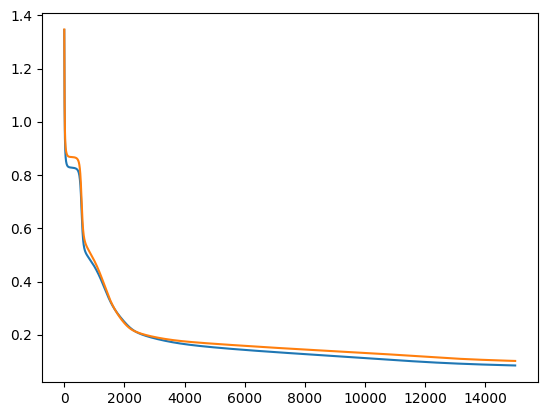

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(loss)
# plt.plot(val_metrics)

In [ ]:
# ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=20,n_hidden_2=20,n_output=y_train.shape[1])

# loss, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,10000,0.0001)

Epoch 0/10000, Train Loss: 1.3458067933510955, Val Loss: 1.3476974457477864
Epoch 100/10000, Train Loss: 0.837086020706496, Val Loss: 0.8762529219730306
Epoch 200/10000, Train Loss: 0.8284487759716663, Val Loss: 0.8679327823855624
Epoch 300/10000, Train Loss: 0.8221351516511948, Val Loss: 0.8618082195843896
Epoch 400/10000, Train Loss: 0.5304145608867049, Val Loss: 0.5635707278766301
Epoch 500/10000, Train Loss: 0.49511618918103684, Val Loss: 0.517703817617728
Epoch 600/10000, Train Loss: 0.48302550638144104, Val Loss: 0.4990279972825324
Epoch 700/10000, Train Loss: 0.4747626363111055, Val Loss: 0.48521071516565834
Epoch 800/10000, Train Loss: 0.46928266635909455, Val Loss: 0.47527904819147704
Epoch 900/10000, Train Loss: 0.46565317341847773, Val Loss: 0.4682582261362202
Epoch 1000/10000, Train Loss: 0.46313841880902873, Val Loss: 0.46325217926458523
Epoch 1100/10000, Train Loss: 0.46122160917585747, Val Loss: 0.4595471129435496
Epoch 1200/10000, Train Loss: 0.4594944979402648, Val Los

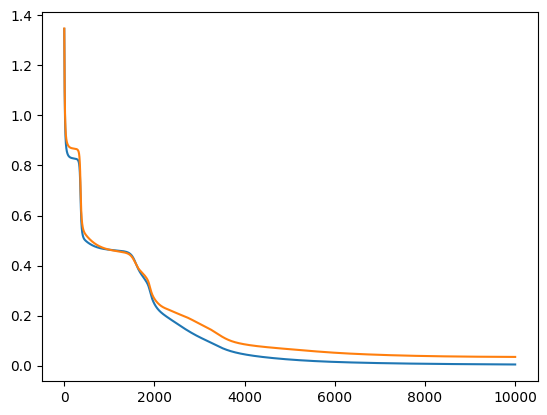

In [ ]:
# plt.plot(loss)
# plt.plot(val_metrics)

In [ ]:
# linear = LinearNetwork(config)

# losses, val_losses = linear.logistic_regression(X_train,y_train,X_val,y_val,epochs=20000,lr=0.0001)
# val_losses[-1]

Epoch 0/20000, Training Loss: 1.3889295147352105, Validation Loss: 1.329963241965588
Epoch 100/20000, Training Loss: 0.5329836529633847, Validation Loss: 0.5794732572445114
Epoch 200/20000, Training Loss: 0.48962784524830044, Validation Loss: 0.5390775654232026
Epoch 300/20000, Training Loss: 0.46970795678241045, Validation Loss: 0.5179104040415549
Epoch 400/20000, Training Loss: 0.4571055414023378, Validation Loss: 0.5032764832133534
Epoch 500/20000, Training Loss: 0.4480888206299344, Validation Loss: 0.49221975277248425
Epoch 600/20000, Training Loss: 0.44121459890624665, Validation Loss: 0.48349730648957123
Epoch 700/20000, Training Loss: 0.43576034614321146, Validation Loss: 0.47641949951028567
Epoch 800/20000, Training Loss: 0.4313079350288389, Validation Loss: 0.47055071217589756
Epoch 900/20000, Training Loss: 0.4275933821479384, Validation Loss: 0.4655973747248898
Epoch 1000/20000, Training Loss: 0.4244400995427411, Validation Loss: 0.46135381811518644
Epoch 1100/20000, Trainin

0.4051486209911782

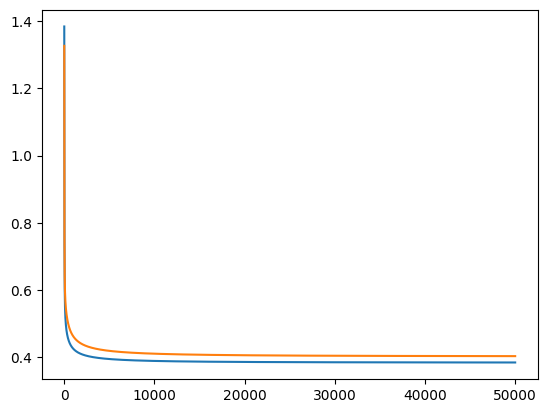

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(losses)
# plt.plot(val_losses)